# import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the csv data 

In [2]:
data = pd.read_csv('Electric Vehicle Sales by State in India 1.csv')

In [3]:
data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


 This dataset contains the details of TElectric Vehicle Sales by State in India and this dataset categorical and  numerical column present in this dataset. Here EV_Sales_Quantity is our target/output veriable, EV_Sales_Quantity which contains numerical so it will be termed as a Regression problem where we need to predict the several EV_Sales_Quantity using the Regression problem.

# check the rows and columns of the dataset

In [4]:
data.shape

(96845, 8)

# check the unique value of of data 

In [5]:
data.nunique().to_frame("No of unique values")

,No of unique values
Year,11
Month_Name,12
Date,121
State,34
Vehicle_Class,73
Vehicle_Category,5
Vehicle_Type,12
EV_Sales_Quantity,1447


# check the unique value of Year column

In [6]:
data ['Year'].unique()

array([2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022.,
       2023., 2024.])

# check the unique value of month column

In [7]:
data ['Month_Name'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

# check the unique value of Date column

In [8]:
data ['Date'].unique()

array(['1/1/2014', '1/1/2015', '1/1/2016', '1/1/2017', '1/1/2018',
       '1/1/2019', '1/1/2020', '1/1/2021', '1/1/2022', '1/1/2023',
       '1/1/2024', '2/1/2014', '2/1/2015', '2/1/2016', '2/1/2017',
       '2/1/2018', '2/1/2019', '2/1/2020', '2/1/2021', '2/1/2022',
       '2/1/2023', '3/1/2014', '3/1/2015', '3/1/2016', '3/1/2017',
       '3/1/2018', '3/1/2019', '3/1/2020', '3/1/2021', '3/1/2022',
       '3/1/2023', '4/1/2014', '4/1/2015', '4/1/2016', '4/1/2017',
       '4/1/2018', '4/1/2019', '4/1/2020', '4/1/2021', '4/1/2022',
       '4/1/2023', '5/1/2014', '5/1/2015', '5/1/2016', '5/1/2017',
       '5/1/2018', '5/1/2019', '5/1/2020', '5/1/2021', '5/1/2022',
       '5/1/2023', '6/1/2014', '6/1/2015', '6/1/2016', '6/1/2017',
       '6/1/2018', '6/1/2019', '6/1/2020', '6/1/2021', '6/1/2022',
       '6/1/2023', '7/1/2014', '7/1/2015', '7/1/2016', '7/1/2017',
       '7/1/2018', '7/1/2019', '7/1/2020', '7/1/2021', '7/1/2022',
       '7/1/2023', '8/1/2014', '8/1/2015', '8/1/2016', '8/1/20

# check the unique value of State column

In [9]:
data ['State'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Andaman & Nicobar Island', 'Bihar', 'Chhattisgarh', 'Chandigarh',
       'DNH and DD', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh',
       'Haryana', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Maharashtra', 'Meghalaya', 'Madhya Pradesh', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal', 'Jammu and Kashmir', 'Manipur'], dtype=object)

# check the unique value of Vehicle_Class column

In [10]:
data ['Vehicle_Class'].unique()

array(['ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE',
       'ARTICULATED VEHICLE', 'BUS', 'CASH VAN', 'CRANE MOUNTED VEHICLE',
       'EDUCATIONAL INSTITUTION BUS', 'EXCAVATOR (COMMERCIAL)',
       'FORK LIFT', 'GOODS CARRIER', 'HARVESTER', 'MAXI CAB',
       'M-CYCLE/SCOOTER', 'MOTOR CAB', 'MOTOR CAR', 'OMNI BUS',
       'PRIVATE SERVICE VEHICLE', 'RECOVERY VEHICLE',
       'THREE WHEELER (PASSENGER)', 'TRACTOR (COMMERCIAL)',
       'TRAILER (AGRICULTURAL)', 'TRAILER (COMMERCIAL)',
       'TRAILER FOR PERSONAL USE', 'VEHICLE FITTED WITH RIG',
       'CAMPER VAN / TRAILER',
       'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)', 'DUMPER',
       'EXCAVATOR (NT)', 'MOPED', 'THREE WHEELER (PERSONAL)',
       'THREE WHEELER (GOODS)', 'EARTH MOVING EQUIPMENT',
       'MOTOR CYCLE/SCOOTER-USED FOR HIRE',
       'CONSTRUCTION EQUIPMENT VEHICLE', 'M-CYCLE/SCOOTER-WITH SIDE CAR',
       'MOBILE WORKSHOP', 'OMNI BUS (PRIVATE USE)',
       'VEHICLE FITTED WITH COMPRESSOR',
       'CAMPER

# check the unique value of date column

In [11]:
data ['Vehicle_Category'].unique()

array(['Others', 'Bus', '2-Wheelers', '4-Wheelers', '3-Wheelers'],
      dtype=object)

# check the unique value of Vehicle_Type column

In [12]:
data ['Vehicle_Type'].unique()

array(['Others', 'Bus', 'Institution Bus', '2W_Personal', '4W_Shared',
       '4W_Personal', '3W_Shared', '3W_Personal', '3W_Goods', '2W_Shared',
       '3W_Shared_LowSpeed', '3W_Goods_LowSpeed'], dtype=object)

# check the unique value of Vehicle_Type column

In [13]:
data ['EV_Sales_Quantity'].unique()

array([0.000e+00, 1.000e+00, 1.000e+01, ..., 1.840e+03, 2.005e+03,
       5.380e+03])

In [14]:
data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


# Check the columns name 

In [15]:
data.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

# check the data types of data

In [16]:
data.dtypes

Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

# Change the data type of year columns float to int

In [17]:
data['Year'] = data['Year'].astype(int)

In [19]:
data.columns.tolist()

['Year',
 'Month_Name',
 'Date',
 'State',
 'Vehicle_Class',
 'Vehicle_Category',
 'Vehicle_Type',
 'EV_Sales_Quantity']

# Check the information about the data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int32  
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(1), int32(1), object(6)
memory usage: 5.5+ MB


# check the null value of data but there is no null value present in this dataset looking good

In [22]:
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

# One more time chek the null value of data using heatmap

<Axes: >

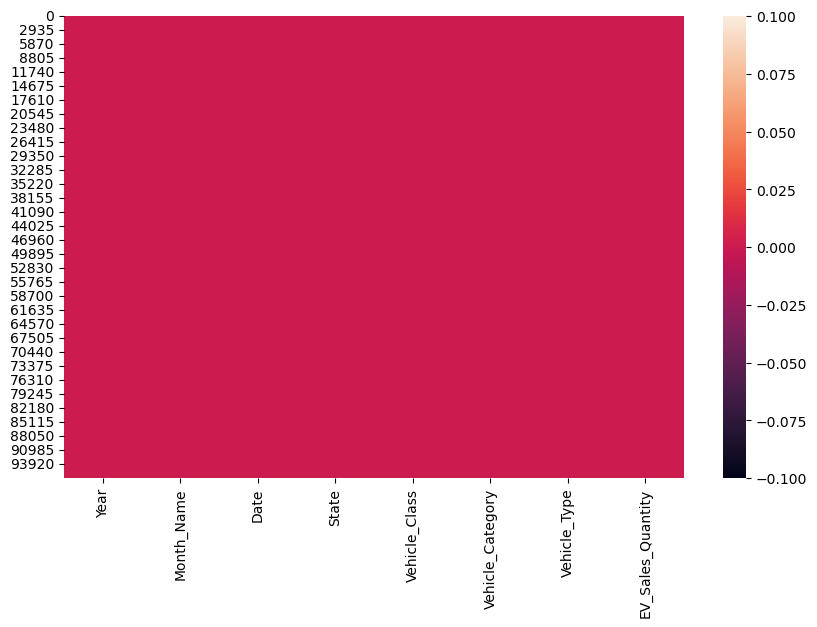

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [24]:
data.isnull().sum()/ data.shape[0]*100

Year                 0.0
Month_Name           0.0
Date                 0.0
State                0.0
Vehicle_Class        0.0
Vehicle_Category     0.0
Vehicle_Type         0.0
EV_Sales_Quantity    0.0
dtype: float64

# Checking the data shape of the data and data types of the data using for loop in single shot

In [25]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

Year
2019    10315
2023    10279
2018    10225
2022    10021
2017     9799
2016     9348
2021     9249
2015     9052
2014     9022
2020     8675
2024      860
Name: count, dtype: int64


Month_Name
jan    8853
mar    8435
nov    8078
dec    8076
feb    8072
sep    8044
oct    8017
jul    7983
apr    7917
aug    7896
jun    7852
may    7622
Name: count, dtype: int64


Date
3/1/2020    933
7/1/2019    887
3/1/2017    877
3/1/2023    876
3/1/2018    876
           ... 
8/1/2020    652
7/1/2020    643
5/1/2021    625
6/1/2020    597
5/1/2020    416
Name: count, Length: 121, dtype: int64


State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra

In [27]:
data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


# Split the columns into two parts one is categorical and one in numerical

In [28]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(" Categorical columns :", categorical_col)
print("\n")

numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(" Numerical columns :", numerical_col)

 Categorical columns : ['Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']


 Numerical columns : ['Year', 'EV_Sales_Quantity']


# check the statistics of the data set like mean median and mode of the data and minimum data maximum of the data 

In [29]:
data.drop(columns=['Year','Date']).describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int32  
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(1), int32(1), object(6)
memory usage: 5.5+ MB


# Check the sales of the vehicle how much vehicle are mostly sold in every year using line plot

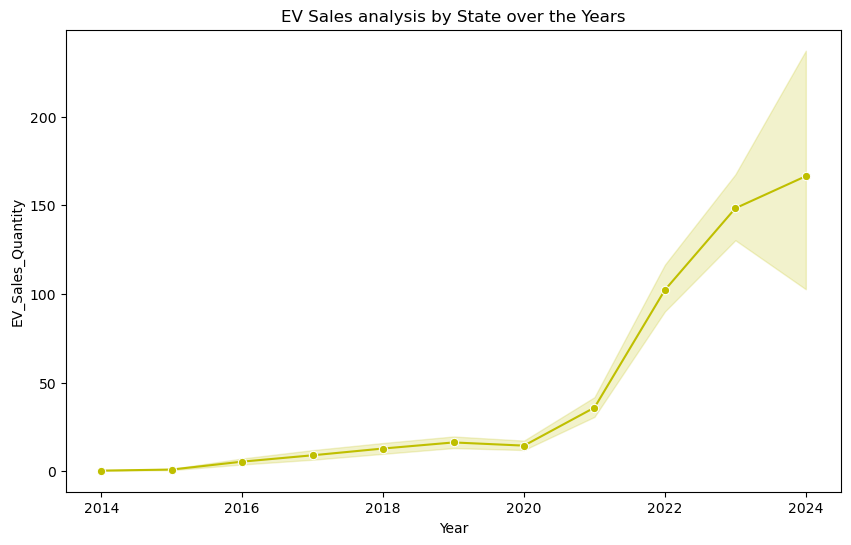

In [124]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='EV_Sales_Quantity',data=data, marker='o',color='y')
plt.title('EV Sales analysis by State over the Years')
plt.show()

# check the vehicle category and sales quantity to finding the pattern which category vehicle are sold mostly using barplot 

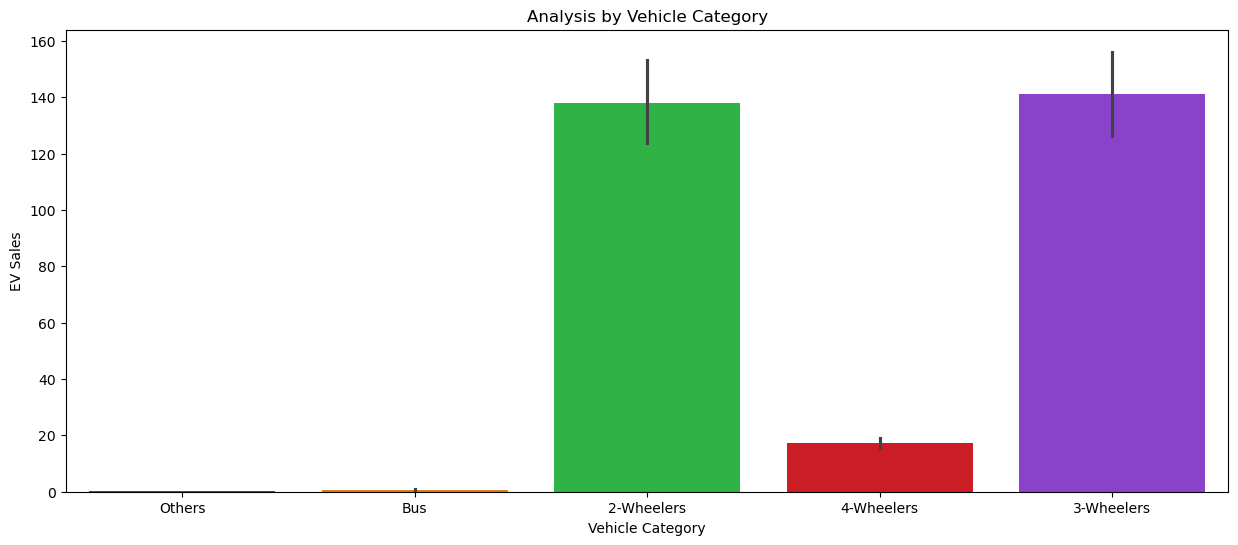

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x='Vehicle_Category',y='EV_Sales_Quantity',data=data, hue='Vehicle_Category',palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.xticks(rotation=0);

# Check the vehicle type and vehicle sales to which type  of vehicle sold most

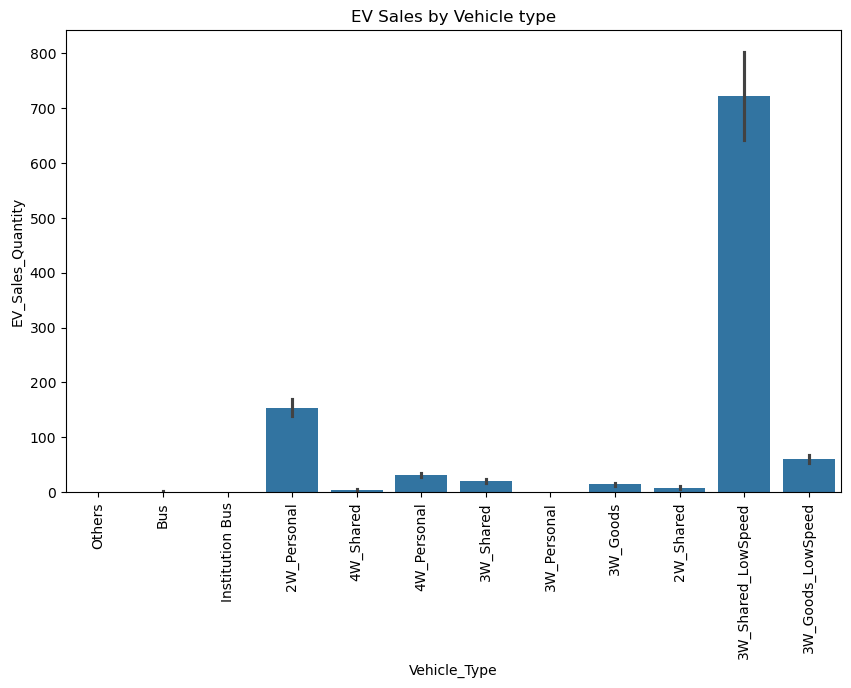

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity',data=data)
plt.title('EV Sales by Vehicle type')
plt.xticks(rotation=90)
plt.show()

# Check the year wise and state wise analysis using line plot

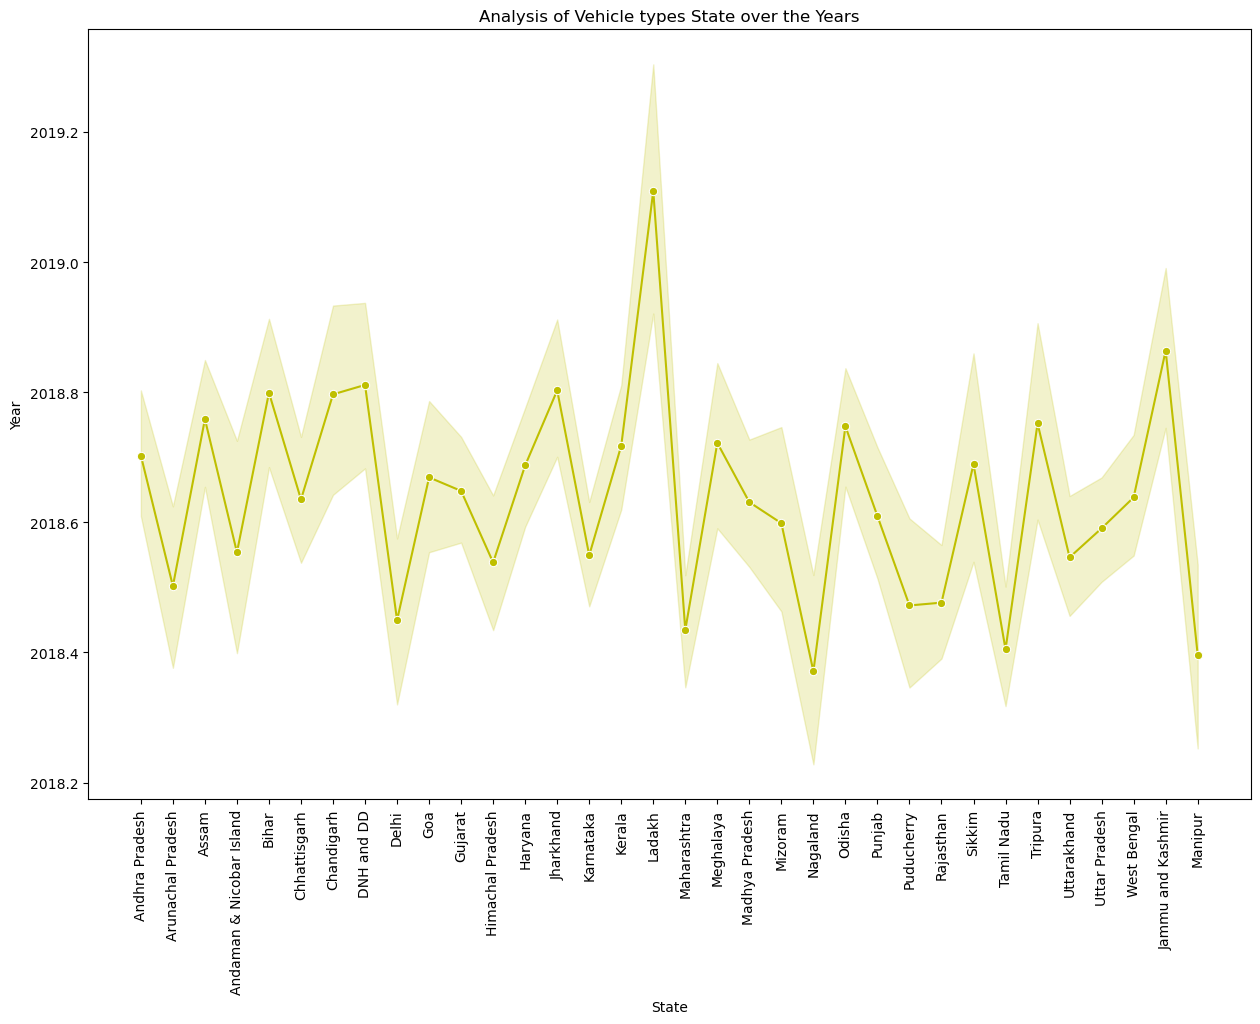

In [34]:
plt.figure(figsize=(15, 10))
sns.lineplot(x='State', y='Year', data=data, marker='o', color='y')
plt.title('Analysis of Vehicle types State over the Years')
plt.xticks(rotation=90)
plt.show()

# Check the sales analysis month wise using barplot 

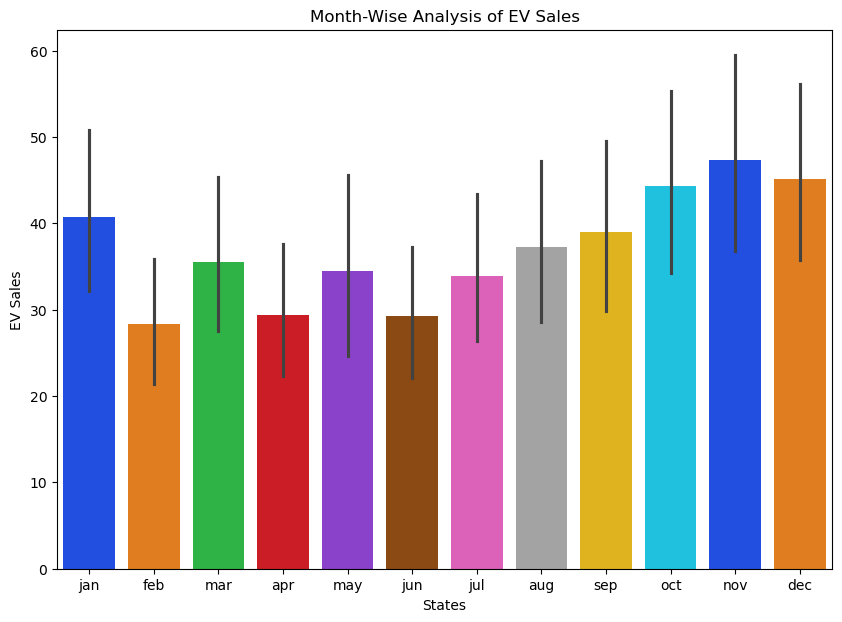

In [35]:
plt.figure(figsize=(10,7))
plt.title('Month-Wise Analysis of EV Sales')
sns.barplot(y='EV_Sales_Quantity', x='Month_Name', data=data,  palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')
plt.show()

# Check the sales_quantity analysis state wise using barplot 

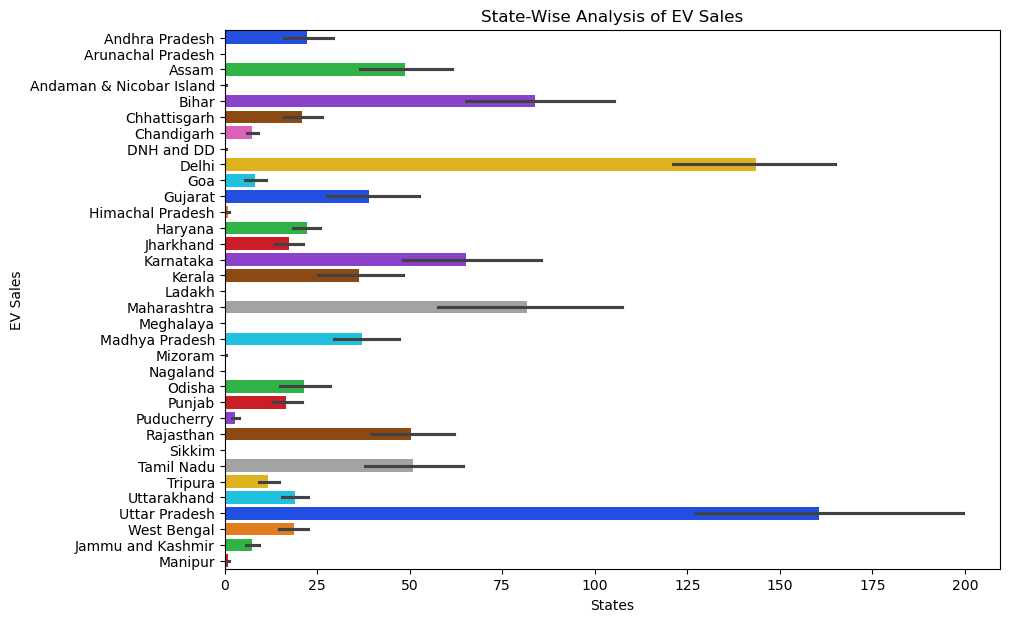

In [36]:
plt.figure(figsize=(10,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=data,  palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')
plt.show()

# Check the Sales_quantity analysis month wise using lineplot

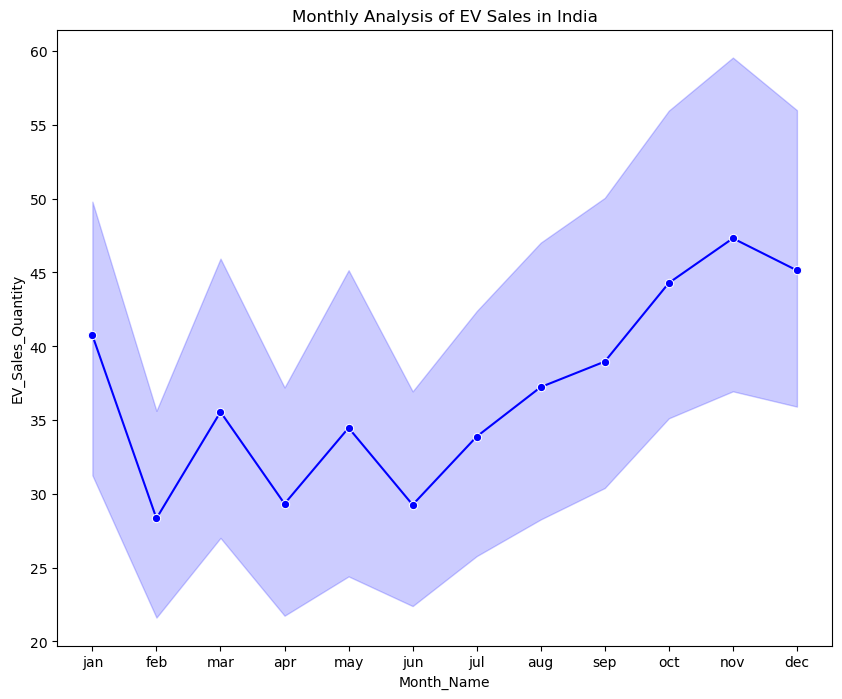

In [37]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=data,marker='o', color='b')
plt.title('Monthly Analysis of EV Sales in India')
plt.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int32  
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(1), int32(1), object(6)
memory usage: 5.5+ MB


# Check the relationship between all the data for each other

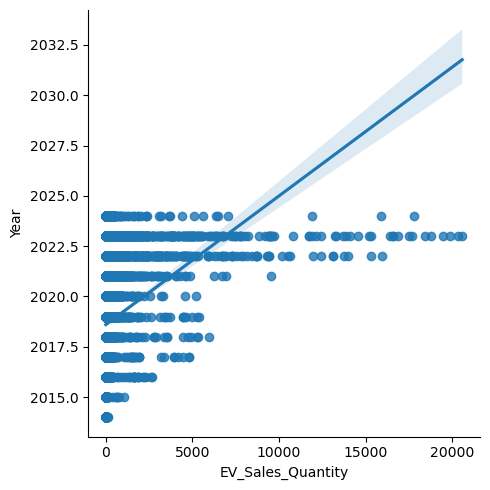

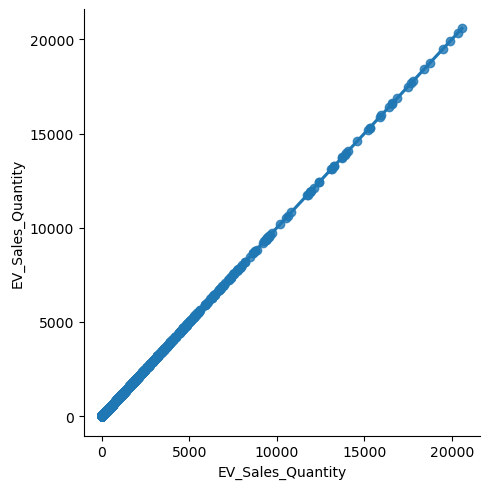

In [39]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.lmplot(x='EV_Sales_Quantity', y=i, data=data)
        plt.show()

# convert the categorical data to numerical data

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
ord_enc = OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=ord_enc.fit_transform(data[i].values.reshape(-1,1))
        
data

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,4.0,0.0,1.0,0.0,4.0,11.0,0.0
1,2014,4.0,0.0,1.0,1.0,4.0,11.0,0.0
2,2014,4.0,0.0,1.0,2.0,4.0,11.0,0.0
3,2014,4.0,0.0,1.0,5.0,4.0,11.0,0.0
4,2014,4.0,0.0,1.0,9.0,3.0,9.0,0.0
...,...,...,...,...,...,...,...,...
96840,2023,2.0,40.0,0.0,40.0,2.0,7.0,1.0
96841,2023,2.0,40.0,0.0,43.0,0.0,1.0,5.0
96842,2023,2.0,40.0,0.0,46.0,3.0,9.0,0.0
96843,2023,2.0,40.0,0.0,58.0,1.0,2.0,0.0


# Analyze all the data in Multivariate analysis using distplot

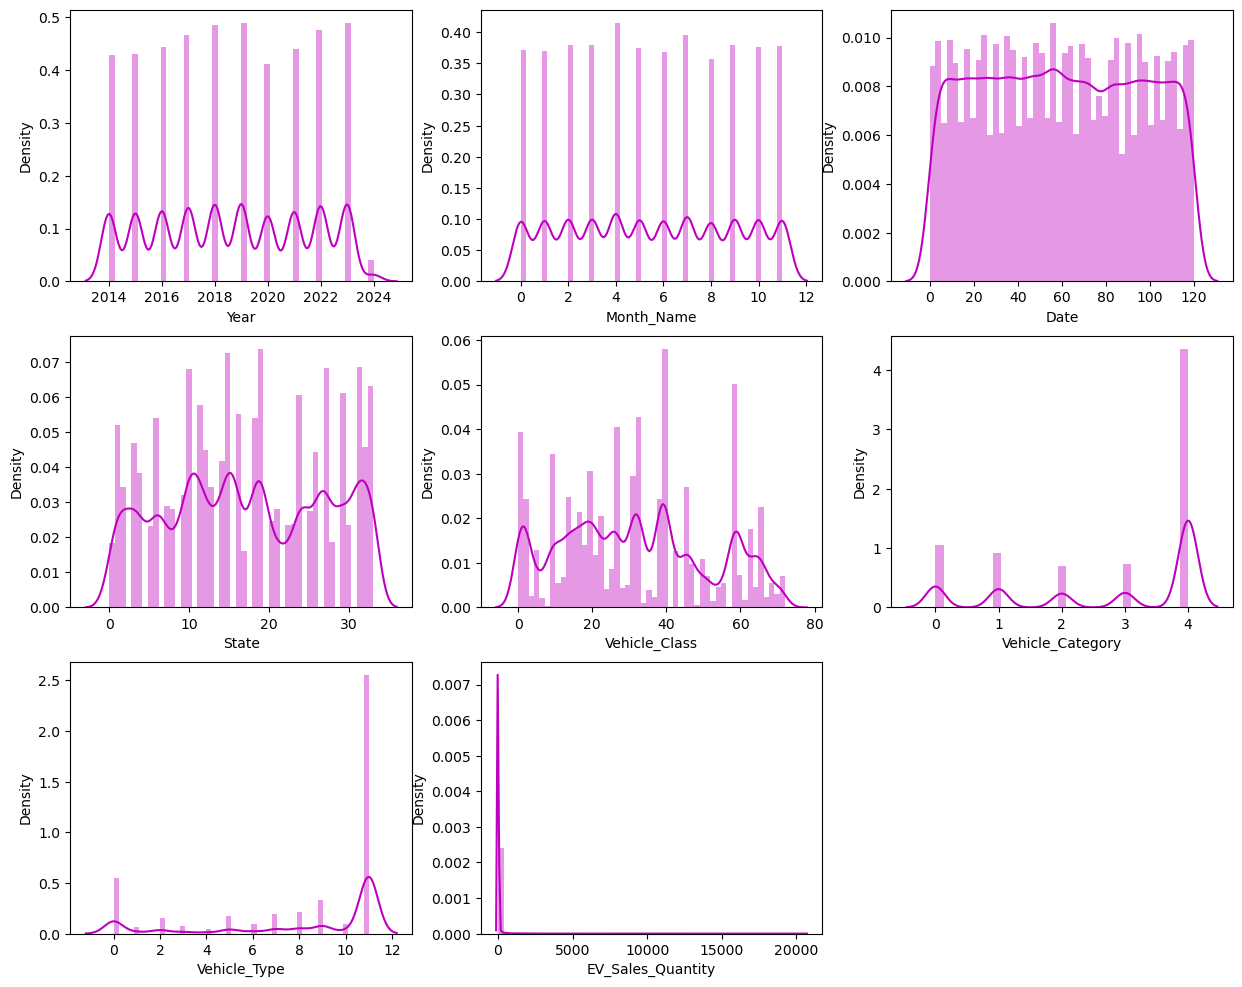

In [42]:
plt.figure(figsize=(15,12), facecolor='white')
plotnumber = 1

for i in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[i], color='m')
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

# identifying  the outliers using Boxplot

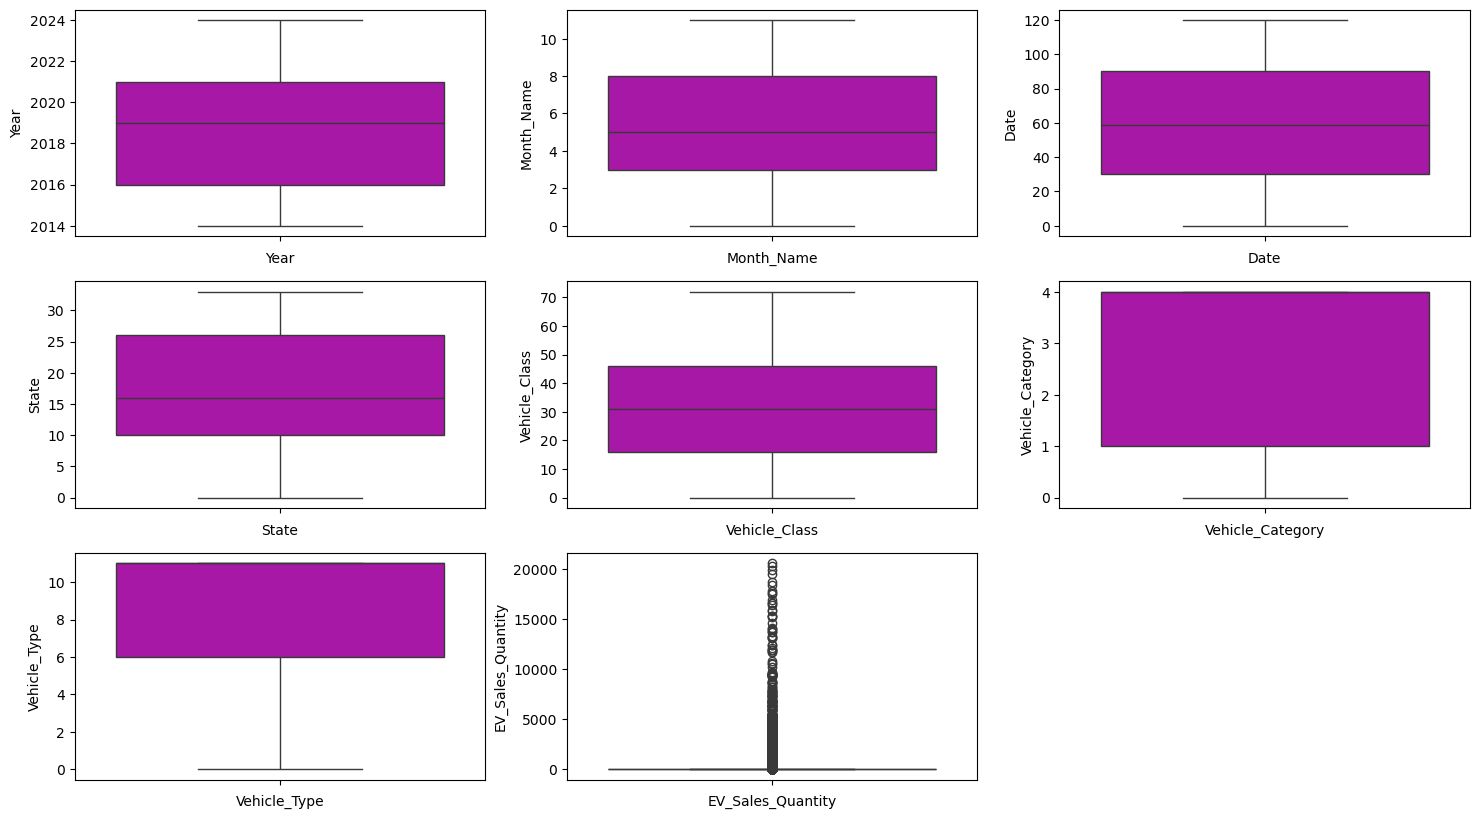

In [43]:
plt.figure(figsize=(18,10), facecolor='white')
plotnumber = 1

for i in data:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[i], color='m')
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

# Check the corelation of the data 

In [44]:
data.corr()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
Year,1.000000,-0.007811,0.052955,-0.015410,-0.041003,-0.038120,-0.037054,0.095326
Month_Name,-0.007811,1.000000,-0.006051,-0.000373,-0.000586,-0.001356,-0.001445,0.005416
Date,0.052955,-0.006051,1.000000,0.000311,-0.003978,-0.004723,-0.004028,0.001081
State,-0.015410,-0.000373,0.000311,1.000000,-0.014803,0.014868,0.014531,0.015425
Vehicle_Class,-0.041003,-0.000586,-0.003978,-0.014803,1.000000,-0.282418,-0.272821,-0.019637
Vehicle_Category,-0.038120,-0.001356,-0.004723,0.014868,-0.282418,1.000000,0.978119,-0.128750
Vehicle_Type,-0.037054,-0.001445,-0.004028,0.014531,-0.272821,0.978119,1.000000,-0.114695
EV_Sales_Quantity,0.095326,0.005416,0.001081,0.015425,-0.019637,-0.128750,-0.114695,1.000000


# Check the corelation of the data set using heatmap

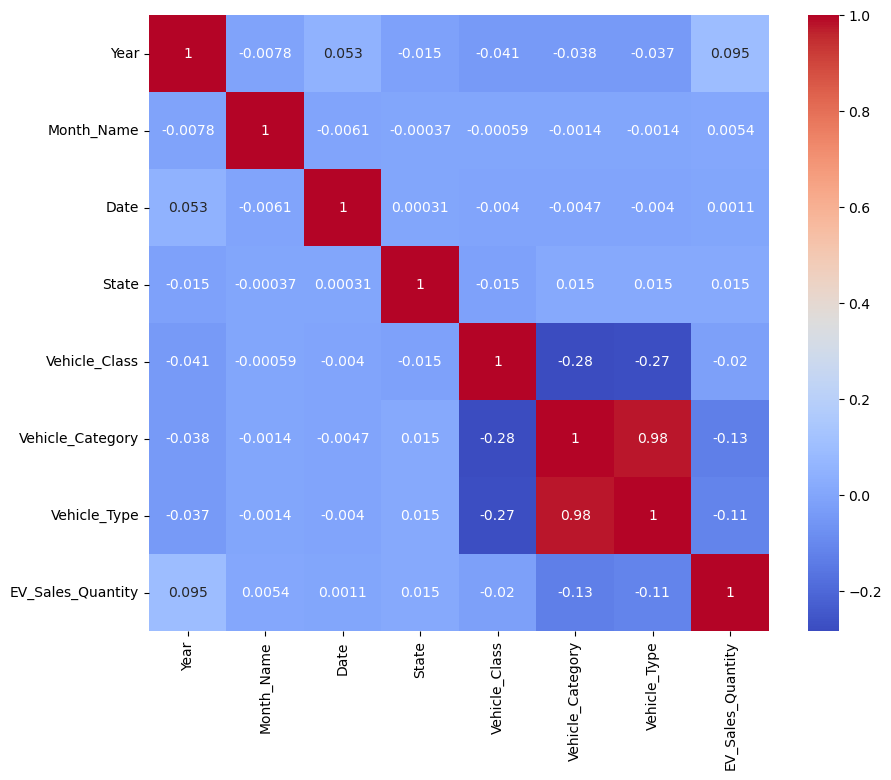

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int32  
 1   Month_Name         96845 non-null  float64
 2   Date               96845 non-null  float64
 3   State              96845 non-null  float64
 4   Vehicle_Class      96845 non-null  float64
 5   Vehicle_Category   96845 non-null  float64
 6   Vehicle_Type       96845 non-null  float64
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 5.5 MB


# split the data into two parts X and Y, X is a training data and Y is a testing data

In [48]:
X = data.drop('EV_Sales_Quantity', axis=1)
Y = data['EV_Sales_Quantity']

In [49]:
X

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type
0,2014,4.0,0.0,1.0,0.0,4.0,11.0
1,2014,4.0,0.0,1.0,1.0,4.0,11.0
2,2014,4.0,0.0,1.0,2.0,4.0,11.0
3,2014,4.0,0.0,1.0,5.0,4.0,11.0
4,2014,4.0,0.0,1.0,9.0,3.0,9.0
...,...,...,...,...,...,...,...
96840,2023,2.0,40.0,0.0,40.0,2.0,7.0
96841,2023,2.0,40.0,0.0,43.0,0.0,1.0
96842,2023,2.0,40.0,0.0,46.0,3.0,9.0
96843,2023,2.0,40.0,0.0,58.0,1.0,2.0


In [50]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96840    1.0
96841    5.0
96842    0.0
96843    0.0
96844    0.0
Name: EV_Sales_Quantity, Length: 96845, dtype: float64

In [51]:
#data.drop(['Date'], axis=1, inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int32  
 1   Month_Name         96845 non-null  float64
 2   Date               96845 non-null  float64
 3   State              96845 non-null  float64
 4   Vehicle_Class      96845 non-null  float64
 5   Vehicle_Category   96845 non-null  float64
 6   Vehicle_Type       96845 non-null  float64
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 5.5 MB


# Scalling the data Using StandardScaler

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type
0,-1.596499,-0.434749,-1.713553,-1.654666,-1.606644,0.769778,0.700048
1,-1.596499,-0.434749,-1.713553,-1.654666,-1.555804,0.769778,0.700048
2,-1.596499,-0.434749,-1.713553,-1.654666,-1.504964,0.769778,0.700048
3,-1.596499,-0.434749,-1.713553,-1.654666,-1.352445,0.769778,0.700048
4,-1.596499,-0.434749,-1.713553,-1.654666,-1.149086,0.112714,0.197707
...,...,...,...,...,...,...,...
96840,1.511702,-1.016688,-0.567883,-1.756858,0.426944,-0.544349,-0.304633
96841,1.511702,-1.016688,-0.567883,-1.756858,0.579463,-1.858476,-1.811656
96842,1.511702,-1.016688,-0.567883,-1.756858,0.731982,0.112714,0.197707
96843,1.511702,-1.016688,-0.567883,-1.756858,1.342058,-1.201413,-1.560486


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  int32  
 1   Month_Name         96845 non-null  float64
 2   Date               96845 non-null  float64
 3   State              96845 non-null  float64
 4   Vehicle_Class      96845 non-null  float64
 5   Vehicle_Category   96845 non-null  float64
 6   Vehicle_Type       96845 non-null  float64
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 5.5 MB


In [56]:
data.skew()

Year                 -0.002293
Month_Name            0.011165
Date                  0.017409
State                -0.004178
Vehicle_Class         0.212233
Vehicle_Category     -0.833464
Vehicle_Type         -1.151254
EV_Sales_Quantity    24.585285
dtype: float64

# Check the outliers using VIF Factor 

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,1.007475,Year
1,1.000098,Month_Name
2,1.002868,Date
3,1.000585,State
4,1.090339,Vehicle_Class
5,23.248908,Vehicle_Category
6,23.110921,Vehicle_Type


# drop the column who is more co related with the other data set

In [59]:
X.drop(['Vehicle_Category'],axis=1, inplace=True)

In [60]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF Values,Features
0,1.007305,Year
1,1.000098,Month_Name
2,1.002856,Date
3,1.000580,State
4,1.083646,Vehicle_Class
5,1.083268,Vehicle_Type


In [61]:
Y.value_counts()

EV_Sales_Quantity
0.0        82783
1.0         2481
2.0         1138
3.0          775
4.0          549
           ...  
3039.0         1
2353.0         1
955.0          1
10506.0        1
5380.0         1
Name: count, Length: 1447, dtype: int64

# Import the regression libraries

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

# Finding the best random score using RandomforestRegressor

In [64]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    
    pred=rf.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on random state ",maxRS)

Maximum r2 score is  0.9378536866320247 on random state  95


 Maximum r2 score is  0.9378536866320247 on random state  95 using RandomForestRegressor

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=maxRS)

# Split the data into training and testing part, here we make 30 % of data is testing purpose and 70 %  of data is training. 

# LinearRegression

In [66]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.0230220290455061
R2_score on training data: 2.4653303259107306
Mean Squared Error: 188947.86118334686
Mean Absolute Error: 83.64114686716104
Root Mean Squared Error: 434.6813329133733


The accurracy for this model is 02 % score using linearRegression

# RandomForestRegressor

In [67]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score: 0.935053894237805
R2_score on training data: 98.76271654490237
Mean Squared Error: 12560.598233310388
Mean Absolute Error: 11.761891650030977
Root Mean Squared Error: 112.07407476000142


 The accurracy for this model is 93 % score using RandomForestRegressor

# DecisionTreeRegressor

In [68]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
pred_train = DT.predict(x_train)
print(DT)
print('R2_score:', r2_score(y_test, pred_DT))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_DT))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_DT))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_DT)))

DecisionTreeRegressor()
R2_score: 0.9007877148102804
R2_score on training data: 100.0
Mean Squared Error: 19187.6886143044
Mean Absolute Error: 13.01091071797343
Root Mean Squared Error: 138.51963259518269


The accurracy for this model is 90 % score using DecisionTreeRegressor

# KNeighborsRegressor as KNN

In [69]:
KNN = KNN()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print(KNN)
print('R2_score:', r2_score(y_test, pred_KNN))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_KNN))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KNN))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_KNN)))

KNeighborsRegressor()
R2_score: 0.01642279815429315
R2_score on training data: 38.573533528780324
Mean Squared Error: 190224.1546100365
Mean Absolute Error: 53.05204791078681
Root Mean Squared Error: 436.14694153465814


The accurracy for this model is 01 % score using KNeighborsRegressor as KNN

# Lasso Regressor

In [70]:
LS = Lasso()
LS.fit(x_train, y_train)
pred_LS = LS.predict(x_test)
pred_train = LS.predict(x_train)
print(LS)
print('R2_score:', r2_score(y_test, pred_LS))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_LS))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LS))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LS)))

Lasso()
R2_score: 0.022998536883852894
R2_score on training data: 2.461663143560644
Mean Squared Error: 188952.40457514374
Mean Absolute Error: 82.44100441449517
Root Mean Squared Error: 434.6865589998657


 The accurracy for this model is 93 % score using Lasso Regressor

# Ridge Regressor

In [71]:
RD = Ridge()
RD.fit(x_train, y_train)
pred_RD = RD.predict(x_test)
pred_train = RD.predict(x_train)
print(RD)
print('R2_score:', r2_score(y_test, pred_RD))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_RD))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RD))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RD)))

Ridge()
R2_score: 0.02302203632528277
R2_score on training data: 2.4653303252353043
Mean Squared Error: 188947.85977543567
Mean Absolute Error: 83.64049670874543
Root Mean Squared Error: 434.6813312938982


 The accurracy for this model is 02 % score using Ridge Regressor

# SVR 

In [72]:
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print(svr)
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
R2_score: -0.004651199721004362
R2_score on training data: -0.5048106002672359
Mean Squared Error: 194299.87273623908
Mean Absolute Error: 36.71991957226273
Root Mean Squared Error: 440.79459245349085


The accurracy for this model is -00 % score using SVR

# ExtraTreesRegressor

In [73]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print(ETR)
print('R2_score:', r2_score(y_test, pred_ETR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

ExtraTreesRegressor()
R2_score: 0.861191543009959
R2_score on training data: 99.99999994775214
Mean Squared Error: 26845.60127471949
Mean Absolute Error: 17.2610005506987
Root Mean Squared Error: 163.84627330128535


# The accurracy for this model is 86 % score using ExtraTreesRegressor

# Check the difference between R2 score and cross validation score using cross_val_score

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score = cross_val_score(LR, X,Y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.0223089  0.02055611 0.02327477 0.02092458 0.02477086]
0.022367041731912885
Difference between R2 score and cross validation score is - 0.06549873135932131


In [76]:
score1 = cross_val_score(RFR, X,Y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RFR) - score1.mean())*100)

[0.83445059 0.9462822  0.92330115 0.94246202 0.87112597]
0.903524385624759
Difference between R2 score and cross validation score is - 3.1529508613046042


In [77]:
score2 = cross_val_score(DT, X,Y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_DT) - score2.mean())*100)

[0.77055131 0.86775772 0.88532687 0.87785145 0.82322747]
0.8449429646254363
Difference between R2 score and cross validation score is - 5.584475018484413


In [78]:
score3 = cross_val_score(KNN, X,Y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_KNN) - score3.mean())*100)

[0.26128755 0.29246774 0.28919982 0.36038733 0.228483  ]
0.2863650855324526
Difference between R2 score and cross validation score is - -26.994228737815945


In [79]:
score4 = cross_val_score(LS, X,Y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LS) - score4.mean())*100)

[0.02268435 0.02085849 0.0233533  0.02109592 0.02435874]
0.022470160538825844
Difference between R2 score and cross validation score is - 0.052837634502704914


In [80]:
score5 = cross_val_score(RD, X,Y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RD) - score5.mean())*100)

[0.0223091  0.02055631 0.02327479 0.02092465 0.02477064]
0.02236709934230898
Difference between R2 score and cross validation score is - 0.06549369829737875


In [88]:
score6 = cross_val_score(svr, X,Y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_svr) - score6.mean())*100)

[-0.00332798 -0.00338867 -0.00491511 -0.00536383 -0.00796936]
-0.004992989900436617
Difference between R2 score and cross validation score is - 0.03417901794322553


In [89]:
score7 = cross_val_score(ETR, X,Y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_ETR) - score7.mean())*100)

[0.81542392 0.94375049 0.92625643 0.96182277 0.85553635]
0.9005579926248446
Difference between R2 score and cross validation score is - -3.9366449614885557


# Hyperparameter tuning using GridSearchCV

In [90]:
param={'max_features':[0.0,1.0],'bootstrap':[True,False],
      'n_estimators':[50,70,80,90,100],
      'bootstrap':[False,True],
      'min_samples_split':[0.5,1,1.5,2]
      
      }
rfr=RandomForestRegressor()
rfr=GridSearchCV(rfr,param,cv=5)
rfr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True], 'max_features': [0.0, 1.0],
                         'min_samples_split': [0.5, 1, 1.5, 2],
                         'n_estimators': [50, 70, 80, 90, 100]})

In [91]:
rfr.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'min_samples_split': 2,
 'n_estimators': 50}

In [93]:
Model1=RandomForestRegressor(bootstrap=True, max_features=1.0, min_samples_split=2, n_estimators=50)

# Check the score after Hyperparameter tuning

In [94]:
Model1.fit(x_train,y_train)
pred=Model1.predict(x_test)
print('R2_score:', r2_score(y_test, pred))
print('Mean Squared Error:-', mean_squared_error(y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.9426891043992065
Mean Squared Error:- 11083.946074743584
Mean Absolute Error:- 11.604097886693742
Root Mean Squared Error:- 105.28032140311686


# Check the Actual and predicted value after using RAndomForestRegressor algorithm and Hyper parameter tuning 

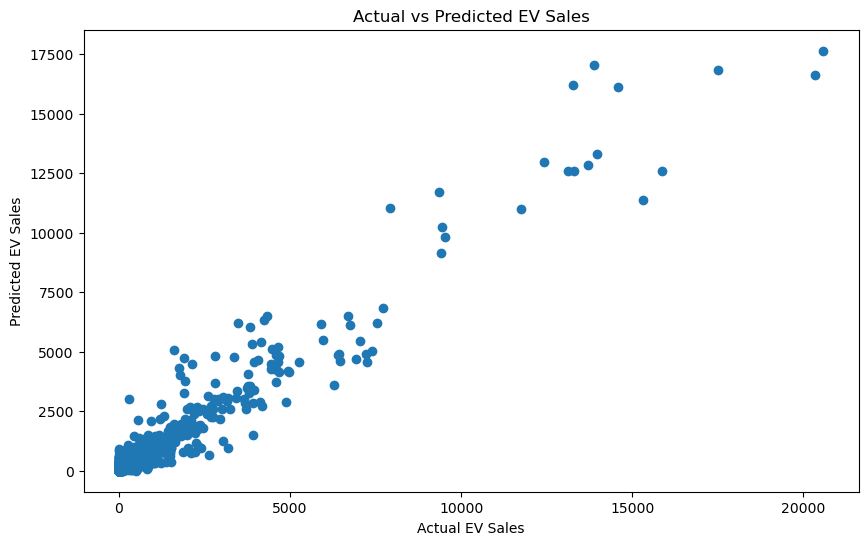

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()

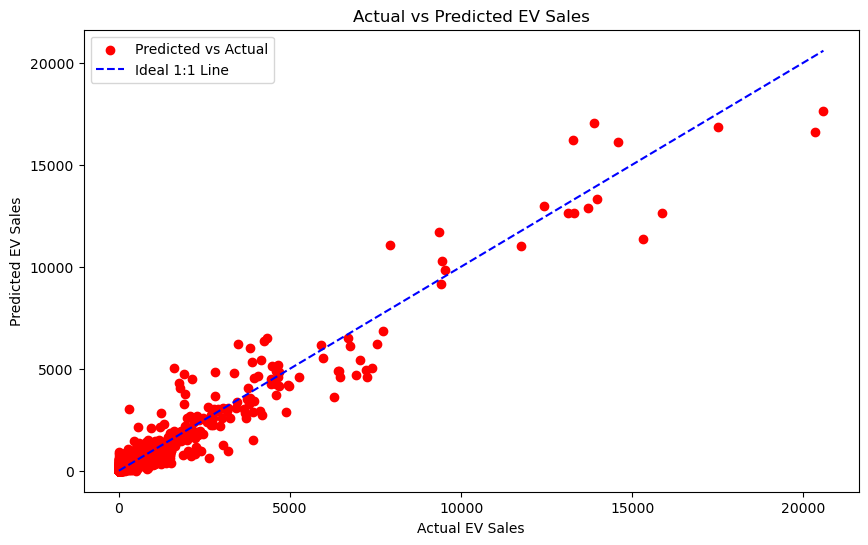

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color='red', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Ideal 1:1 Line')
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.legend()
plt.show()

# Save the model using Pickle

In [118]:
import pickle
filename='Electric Vehicle Sales.pkl'
pickle.dump(Model1,open(filename,'wb'))

In [119]:
load = pickle.load(open('Electric Vehicle Sales.pkl','rb'))
result = load.score(x_test, y_test)
print(result*100)

94.26891043992065


In [120]:
conclusion = pd.DataFrame([load.predict(x_test)[:], y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,29044,29045,29046,29047,29048,29049,29050,29051,29052,29053
predicted,0.0,0.0,0.24,13.64,0.0,0.04,1.26,21.12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.82
original,0.0,0.0,0.00,9.00,0.0,0.00,2.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00
